##### 샘플 데이터

In [109]:
import pandas as pd
import re
from tqdm import tqdm
from konlpy.tag import Okt
import pickle
import gensim #자연어 처리 및 토픽 모델링을 위한 라이브러리
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
import random

In [110]:
df = pd.read_csv("ALL_DATA_MERGED_FINAL.csv", encoding="utf-8")

In [112]:
def re_pattern(string) :
    pattern = re.compile(r'[^a-zA-Z가-힣\s\.\?\!]')
    string = re.sub(pattern, ' ', string)

    pattern2 = re.compile(r'\s+')
    result = re.sub(pattern2, ' ', string)
    return result

In [113]:
# .copy()를 추가하여 독립된 데이터프레임으로 생성
df = df.dropna(subset=['content']).copy()

df['content'] = df['content'].apply(lambda x : re_pattern(x))

In [114]:
# apply
df = df[df['content'].apply(lambda x : len(x) > 15)]
# df

In [115]:
df = df.reset_index(drop=True)
len(df)

21711

In [116]:
# 추가 전처리

df['content'] = df['content'].str.strip()  # 앞뒤 공백 제거
df['content'] = df['content'].str.replace("\n", " ")  # 줄바꿈 제거


In [117]:
# content 컬럼 기준으로 중복 행 제거
df = df.drop_duplicates(subset=['content'], keep='first')
df = df.reset_index(drop=True)
len(df)

21289

In [15]:
okt=Okt()
stopwords_df = pd.read_csv(r"ko-stopwords.csv")

In [16]:
stopwords = set(stopwords_df['stopwords']) #집합 변경

In [17]:
def okt_pos_tagging(string) :
    pos_words = okt.pos(string, stem =True, norm=True)
    result = [word for word, tag in pos_words if word not in stopwords if tag in {'Noun', 'Adjective', 'Verb'} ]
    return result

In [18]:
tqdm.pandas()

In [19]:
df['tagged_content'] = df['content'].progress_apply(lambda x : okt_pos_tagging(x))

100%|██████████████████████████████████████████████████████████████████████████| 21289/21289 [1:06:25<00:00,  5.34it/s]


In [20]:
with open("tagged_content_1119.pkl", 'wb') as f:
    pickle.dump(df, f)

In [21]:
with open("tagged_content_1119.pkl", "rb") as f:
    data = pickle.load(f)

df = pd.DataFrame(data)

,keyword,title,content,date,url,tagged_content
0,HearingLoss,월 일로 끝나는 주 SemiPro 뉴스,참고 기사 링크는 관련 팀 이름에 포함되어 있습니다. 대부분의 기사는 브라우저 내 ...,2025-11-10,https://www.reddit.com/r/KLeague/comments/1osz...,"[참고, 기사, 링크, 관련, 팀, 이름, 포함, 되어다, 대부분, 기사, 브라우저..."
1,HearingLoss,나 자퇴하는 중이야,안녕하세요 저는 현재 학년이고 학교를 자퇴하고 싶습니다. 학교 공부는 나에게 전혀 ...,2025-11-09,https://www.reddit.com/r/careeradvice/comments...,"[안녕하다, 현재, 학년, 학교, 자퇴, 싶다, 학교, 공부, 전혀, 쓸모, 없다,..."
2,HearingLoss,가이드 캡슐리어의 고개 끄덕임 치유되어 다시 비행하는 방법 비행 철학,가이드 캡슐리어의 끄덕임 치유를 느끼고 다시 비행하는 방법 비행 철학 작성자 캡슐리...,2025-11-07,https://www.reddit.com/r/magicbuilding/comment...,"[가이드, 캡슐, 리, 어의, 끄덕이다, 치유, 느끼다, 다시, 비행, 방법, 비행..."
3,HearingLoss,Widex Smart RIC s의 새로운 기능 스트리밍 도움말,안녕하세요 긴 게시물을 짧게 하려고 노력하다가 지난 개월 동안 이명이 심해졌고 중간...,2025-11-07,https://www.reddit.com/r/HearingAids/comments/...,"[안녕하다, 기다, 게시, 물, 짧다, 노력, 지난, 개월, 이명, 심해지다, 중간..."
4,HearingLoss,남편이 해리 에피소드나 발작을 겪었나요?,안녕하세요 이것이 무례하거나 해롭지 않기를 바랍니다. 저는 완전히 당황했습니다. 어...,2025-11-04,https://www.reddit.com/r/Dissociation/comments...,"[안녕하다, 무례하다, 해롭다, 않다, 바라다, 완전하다, 당황, 어젯밤, 남편, ..."
...,...,...,...,...,...,...
21284,auFsy1Lx2t8,comment,레알 격공이네요.... 집들이 전통문화..,2022-03-31,874,"[레알, 격, 공이, 집들이, 전통문화]"
21285,auFsy1Lx2t8,comment,내 집의 비밀번호 찐친 농인들만의 공공재..,2022-03-28,875,"[내, 집의, 비밀번호, 찌다, 친, 농인, 공공재]"
21286,auFsy1Lx2t8,comment,저도 비슷한 경험있었죠 얼마 전에 네일클래스배우러갔는데요 하필 장실이 복도맞은편에 ...,2022-03-28,876,"[경험, 전, 클래스, 배우다, 가다, 하필, 장실, 복도, 맞은편, 수업, 장실,..."
21287,auFsy1Lx2t8,comment,청인 전화하면 청인은 전화벨 듣고 문 열어줌 농인 문자보내고 전화해도 진동 소리 못...,2022-03-28,877,"[청, 전화하다, 청, 전화, 벨, 듣다, 문, 열다, 줌, 농인, 문자, 보내다,..."


In [23]:
tagged_corpus_list = []

for n, i in enumerate(df['tagged_content']):
    tag = "document{}".format(n) # ID 만들기
    tagged_corpus_list.append(TaggedDocument(tags=[tag], words = i))

In [24]:
model_doc2vec = Doc2Vec(vector_size = 200,
                        alpha = 0.025,
                        min_alpha = 0.01,
                        window = 3,
                        min_count = 5,
                        dm = 0
                       )

In [25]:
#단어사전 장착
model_doc2vec.build_vocab(tagged_corpus_list)

In [26]:
n_epochs = 20

for epoch in tqdm(range(n_epochs), desc="Training Epochs"):
    random.shuffle(tagged_corpus_list)  # 매 epoch마다 데이터 섞기 추천
    model_doc2vec.train(
        tagged_corpus_list,
        total_examples=model_doc2vec.corpus_count,
        epochs=1
    )


Training Epochs: 100%|█████████████████████████████████████████████████████████████████| 20/20 [03:11<00:00,  9.57s/it]


In [27]:
vector_list = []
for i in range(len(df)) :
    doc2vec = model_doc2vec.dv["document{}".format(i)]
    vector_list.append(doc2vec)

In [28]:
df['vector'] = vector_list

In [29]:
# 저장하기
import pickle
with open('1119_vector_df_2.pkl', 'wb') as f:
    pickle.dump(df, f)

In [118]:
# # 불러오기
import pickle
with open('1119_vector_df_2.pkl', 'rb') as f:
    df = pickle.load(f)

In [119]:
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

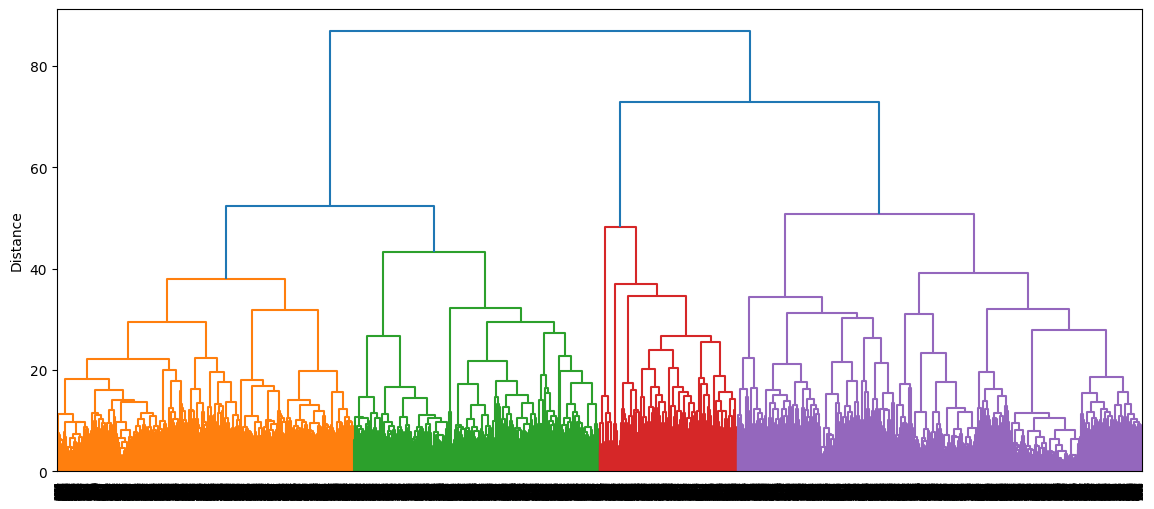

In [92]:
####### 이슈 log : 데이터 많아서 memory error 발생
# 샘플링해서 일부만 그려보기 : 무작위 추출
 
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
 
# 데이터 불러오기 (리스트 형태 → 2D 배열)
X = np.vstack(df['vector'].to_list()).astype('float32')
 
# 2000개 랜덤 샘플
n = min(3000, len(X))
idx = np.random.choice(len(X), size=n, replace=False)
X_sample = X[idx]
 
# 계층적 군집 + 덴드로그램
Z = linkage(X_sample, method='ward')
plt.figure(figsize=(12, 6))
dendrogram(Z, truncate_mode="level", p=10)  # 가지 너무 많을 때 잘라서 보기
plt.show()

In [74]:
!pip install scikit-learn

In [ ]:
from sklearn.metrics.cluster import silhouette_score
from sklearn.cluster import AgglomerativeClustering

In [ ]:
# ############## 기본 코드:  n개의 클러스터로 구분해 보기 #################
# cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
# cluster_label = cluster_model.fit_predict(list(df['vector']))
# cluster_label
# ###############################################################

import time
import numpy as np
from sklearn.cluster import AgglomerativeClustering

print(">>> Clustering start (n_clusters=5, linkage='ward')", flush=True)
t0 = time.time()

cluster_model = AgglomerativeClustering(n_clusters=5, linkage='ward')
cluster_label = cluster_model.fit_predict(list(df['vector']))  # 기존 코드 유지

elapsed = time.time() - t0
print(f">>> Done in {elapsed:.2f} sec", flush=True)

# 결과 요약
print(">>> Unique labels:", np.unique(cluster_label))
print(">>> Counts by label:", np.bincount(cluster_label))


In [ ]:
df

In [ ]:
df['cluster'] = cluster_label

In [ ]:
# 피클 파일로 저장하기
import pickle

with open("cluster_label_0924.pkl", 'wb') as f:
    pickle.dump(df, f)

In [ ]:
df2 = df.sample(frac=1).reset_index(drop=True)
df2 =  df2[:3000]
df2

In [ ]:
# 실루엣 지수 구하기
n_cluster = [
]
clustering_score = []

for i in tqdm(range(2,15)) :
    cluster_model = AgglomerativeClustering(n_clusters=i , linkage='ward')
    cluster_label = cluster_model.fit_predict(list(df2['vector']))
    score = silhouette_score(list(df2['vector']), cluster_label)
    n_cluster.append(i)
    clustering_score.append(score)

In [ ]:
import numpy as np
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score

# 샘플링
df2 = df.sample(frac=1, random_state=42).reset_index(drop=True).iloc[:3000]

# numpy 배열로 변환
X = np.vstack(df2['vector'].to_numpy())

n_cluster = []
clustering_score = []

for i in tqdm(range(2, 15)):
    cluster_model = AgglomerativeClustering(n_clusters=i, linkage='ward')
    cluster_label = cluster_model.fit_predict(X)
    score = silhouette_score(X, cluster_label)
    n_cluster.append(i)
    clustering_score.append(score)

print(list(zip(n_cluster, clustering_score)))


In [ ]:
clustering_score

In [ ]:
plt.plot(n_cluster, clustering_score)

In [ ]:
result = pd.DataFrame({'n_cluster':n_cluster, 'score':clustering_score})
result

In [120]:
from gensim.models import CoherenceModel #coherence 모델 라이브러리
import matplotlib.pyplot as plt #그래프 그리기
import numpy as np
import gensim
from gensim import corpora, models
from gensim.corpora import Dictionary

In [121]:
import gensim
from gensim import corpora, models

In [57]:
dictionary = corpora.Dictionary(df['tagged_content'])

In [59]:
# ID랑 매칭
corpus = [dictionary.doc2bow(doc) for doc in df['tagged_content']]
corpus

[[(0, 1),
  (1, 3),
  (2, 2),
  (3, 1),
  (4, 4),
  (5, 2),
  (6, 1),
  (7, 4),
  (8, 2),
  (9, 3),
  (10, 1),
  (11, 1),
  (12, 1),
  (13, 3),
  (14, 1),
  (15, 1),
  (16, 2),
  (17, 1),
  (18, 1),
  (19, 1),
  (20, 1),
  (21, 4),
  (22, 1),
  (23, 1),
  (24, 1),
  (25, 1),
  (26, 2),
  (27, 1),
  (28, 1),
  (29, 1),
  (30, 2),
  (31, 1),
  (32, 13),
  (33, 1),
  (34, 1),
  (35, 1),
  (36, 1),
  (37, 1),
  (38, 1),
  (39, 1),
  (40, 1),
  (41, 1),
  (42, 1),
  (43, 1),
  (44, 1),
  (45, 1),
  (46, 1),
  (47, 1),
  (48, 1),
  (49, 2),
  (50, 1),
  (51, 1),
  (52, 2),
  (53, 2),
  (54, 1),
  (55, 1),
  (56, 3),
  (57, 1),
  (58, 2),
  (59, 3),
  (60, 4),
  (61, 1),
  (62, 1),
  (63, 1),
  (64, 4),
  (65, 1),
  (66, 3),
  (67, 1),
  (68, 1),
  (69, 2),
  (70, 1),
  (71, 1),
  (72, 1),
  (73, 1),
  (74, 1),
  (75, 1),
  (76, 1),
  (77, 1),
  (78, 1),
  (79, 1),
  (80, 1),
  (81, 1),
  (82, 1),
  (83, 2),
  (84, 1),
  (85, 1),
  (86, 1),
  (87, 2),
  (88, 1),
  (89, 1),
  (90, 1),
  (91, 1

In [60]:
top_n = 3
# 모델 생성
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=top_n, id2word = dictionary)

In [67]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import gensim
from gensim.models import CoherenceModel

K-Means & Silhouette 분석 시작...
K=2 완료 | Silhouette: 0.0257
K=3 완료 | Silhouette: 0.0188
K=4 완료 | Silhouette: 0.0076
K=5 완료 | Silhouette: 0.0067
K=6 완료 | Silhouette: 0.0028
K=7 완료 | Silhouette: -0.0239
K=8 완료 | Silhouette: -0.0210
K=9 완료 | Silhouette: -0.0226


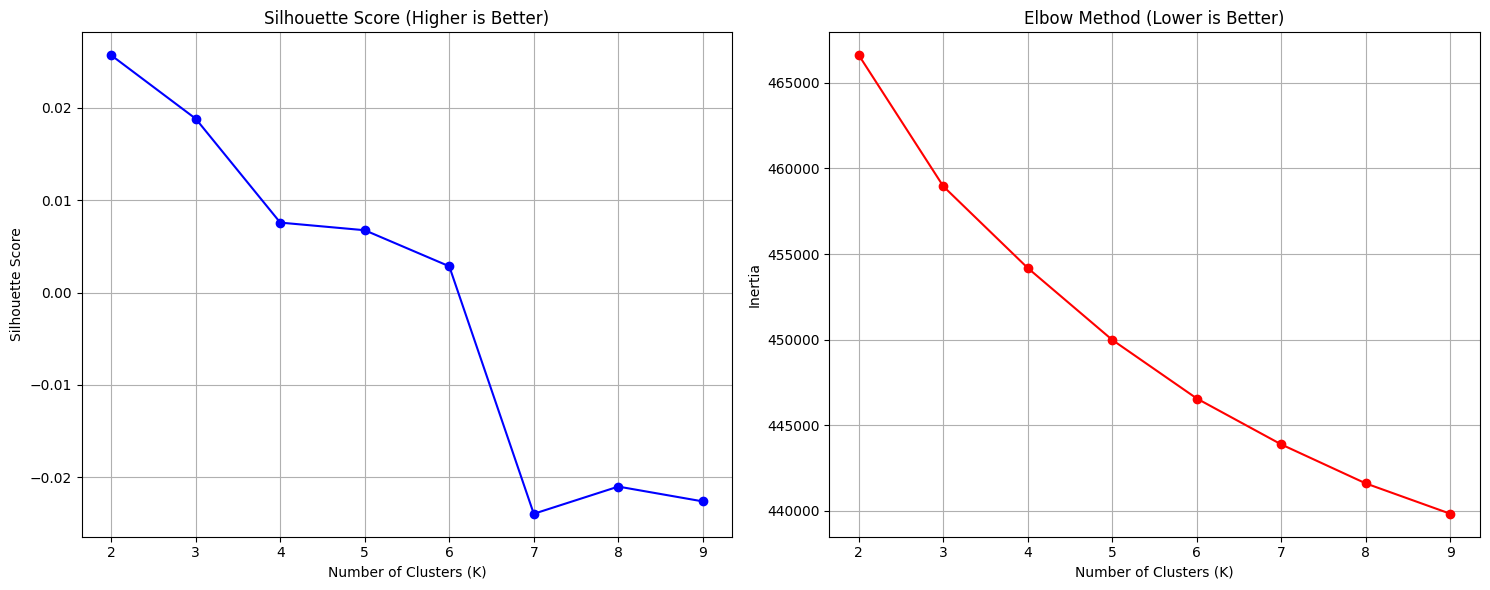

In [139]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import numpy as np

# 1. 데이터 준비 (가장 중요: 벡터 고정)
# 리스트 형태의 벡터를 2차원 numpy 배열로 변환
X_fixed = np.vstack(df['vector'].to_list())

# 결과 저장 리스트
inertia_scores = []   # Elbow (낮을수록 좋음, 꺾이는 지점 확인)
silhouette_scores = [] # Silhouette (높을수록 좋음)

# 군집 개수 범위 (2 ~ 9)
k_range = range(2, 10)

print("K-Means & Silhouette 분석 시작...")

for k in k_range:
    # 모델 생성 및 학습
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_fixed)
    
    # 1. Elbow (Inertia) 저장
    inertia_scores.append(kmeans.inertia_)
    
    # 2. Silhouette Score 저장
    score = silhouette_score(X_fixed, labels)
    silhouette_scores.append(score)
    
    print(f"K={k} 완료 | Silhouette: {score:.4f}")

# --- 시각화 ---
plt.figure(figsize=(15, 6))

# 왼쪽 그래프: Silhouette Score
plt.subplot(1, 2, 1)
plt.plot(k_range, silhouette_scores, 'o-', color='blue')
plt.title('Silhouette Score (Higher is Better)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.grid(True)

# 오른쪽 그래프: Elbow Method (Inertia)
plt.subplot(1, 2, 2)
plt.plot(k_range, inertia_scores, 'o-', color='red')
plt.title('Elbow Method (Lower is Better)')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia')
plt.grid(True)

plt.tight_layout()
plt.show()

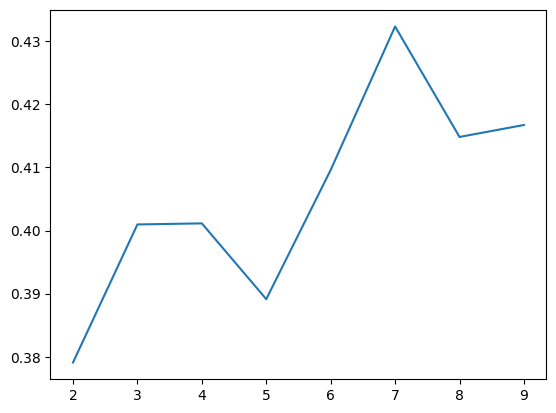

In [64]:
x = range(2,10)

plt.plot(x, c_score)
plt.show()

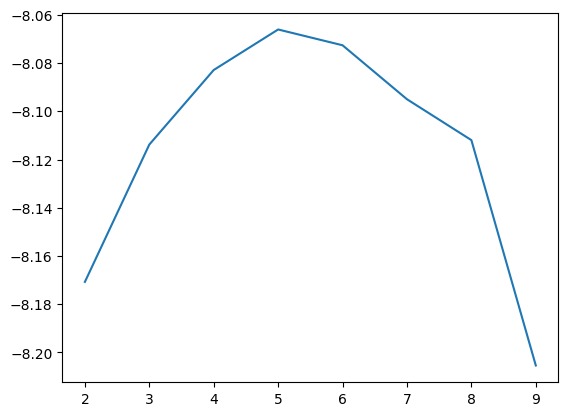

In [65]:
x = range(2,10)

plt.plot(x,p_score)
plt.show()

In [122]:
from sklearn.cluster import AgglomerativeClustering

In [123]:
cluster_model = AgglomerativeClustering(n_clusters=3, linkage='ward')
cluster_label = cluster_model.fit_predict(list(df['vector']))
cluster_label

array([1, 1, 1, ..., 0, 0, 0], shape=(21289,))

In [124]:
df['cluster'] = cluster_label

In [125]:
from collections import Counter
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer

In [126]:
all_document = []

for i in df['cluster'].unique() :
    print(i)
    pos_tagging = df[df['cluster'] == i]['tagged_content'] 

    document = ''
    for pos in pos_tagging :
        doc = ' '.join(pos) + ' '
        document += doc
    all_document.append(document)

1
0
2


In [127]:
#TF-IDF 벡터라이저 선언
vectorizer = TfidfVectorizer()
# TF-IDF 메트릭스 핏
tfidf_matrix = vectorizer.fit_transform(all_document)

In [128]:
# 키워드도출
feature_name = vectorizer.get_feature_names_out()

In [129]:
# TF-IDF 값
tfidf_value = tfidf_matrix.toarray()

In [130]:
tfidf_df = pd.DataFrame(tfidf_value, columns = feature_name)

In [131]:
tfidf_df.index = df['cluster'].unique()

In [132]:
tfidf_df_T = tfidf_df.T

In [133]:
for i in tfidf_df_T.columns :
    #점수 정렬
    tfidfvalue = tfidf_df_T[i].sort_values(ascending=False)
    #데이터 프레임으로 변환
    data = {'tfidf_word': tfidfvalue.index, 'tfidf': tfidfvalue.values}
    data_df = pd.DataFrame(data)
    data_df.to_csv(f'cluster{i}_tf_idf_0924_ 2차(5로).csv', encoding='utf-8-sig')

In [134]:
import pickle

with open('clustering_result_1119_2차(5로).pkl', 'wb') as f:
    pickle.dump(df, f)

In [135]:
df.to_csv("Actor 클러스터링.csv",encoding = 'utf-8-sig')